# Project 2：NASA Data Acquisation, Visualization, and Analysis
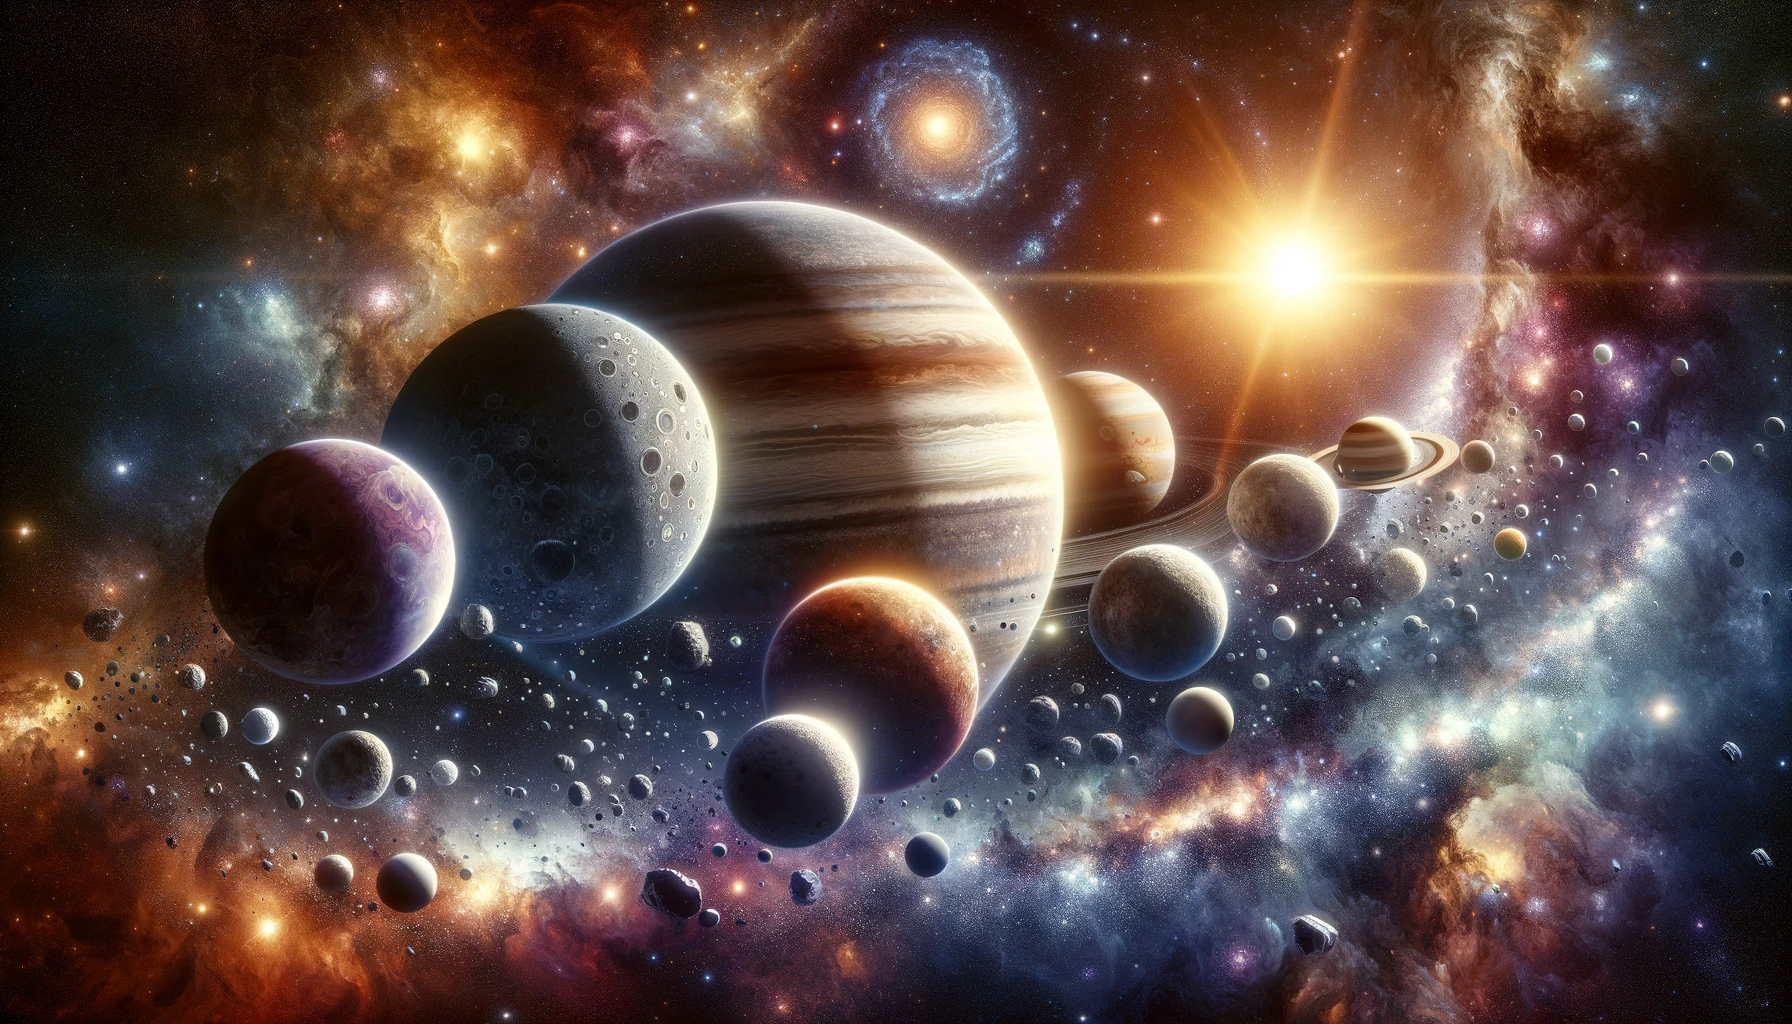

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection


This task involves analyzing data from NASA on Near Earth Objects (NEOs) by utilizing a Python script to fetch and load the dataset stored as a pickle file. The process includes downloading the file, inspecting its structure, and extracting relevant information. This analysis aims to provide a deeper understanding of the key attributes of NEOs and their potential implications.

Below codes will load the data

In [2]:
import gdown
import pickle

# Google Drive file ID
file_id = '1iW47qh3E2ccZVQ4fOs9-UP0xNEjhNae2'
# URL to the file
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output file name
output = 'file.pkl'

# Download the file
gdown.download(url, output, quiet=False)

# Load the pickle file
with open(output, 'rb') as f:
    data = pickle.load(f)

# Inspect the structure of the first element in the list
print(type(data[0]))  # Check the type of the first element

# If it's a dictionary, inspect its keys
if isinstance(data[0], dict):
    print(data[0].keys())  # Print the keys of the first dictionary

# Print the first element to understand its contents
print(data[0])

# Optionally, print the first few elements to understand the structure of the list
print(data[:3])



Downloading...
From: https://drive.google.com/uc?export=download&id=1iW47qh3E2ccZVQ4fOs9-UP0xNEjhNae2
To: /Users/amalielundorff/Desktop/Group 8 /file.pkl
100%|██████████| 5.26M/5.26M [00:00<00:00, 26.3MB/s]

<class 'dict'>
dict_keys(['links', 'element_count', 'near_earth_objects'])
{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17', 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17', 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'}, 'element_count': 125, 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=4mYZd47bA0jdwI3XxbUjB6mHNW0RFOTdahjQ0s17'}, 'id': '2216523', 'neo_reference_id': '2216523', 'name': '216523 (2001 HY7)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523', 'absolute_magnitude_h': 20.7, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1925550782, 'estimated_diameter_m

The script fetches Near Earth Object (NEO) data from NASA's API for a specified date range, making queries in weekly intervals. It uses the API key for authentication and fetches the data into the JSON format and storing it in a list. Successful responses are saved to a file (neo_data.json) for future analysis, while any failed requests are logged with error details. 
At the end, the script checks the data coverage by listing the unique dates included in the retrieved dataset to ensure completeness and providing an overview of the collected information.

In [3]:
import requests
import time
from datetime import datetime, timedelta
import json

# Set your NASA API KEY directly here
api_key = "yXwzpcUu5GIzkta6ZHXmYol6gCYa4ZZPcVbTBST6"

# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(
        f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}'
    )
    if response.status_code == 200:
        data.append(response.json())
        print(f"Data fetched for {current_date.strftime('%Y-%m-%d')} to {next_date.strftime('%Y-%m-%d')}")
    else:
        print(f"Failed to fetch data for {current_date.strftime('%Y-%m-%d')} to {next_date.strftime('%Y-%m-%d')}. Status code: {response.status_code}")
        print(response.text)
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Save the fetched data to a file for future analysis
with open("neo_data.json", "w") as file:
    json.dump(data, file)

# Check the date coverage of your data
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print("Dates contained in the fetched data:")
print(sorted(dates_contained_in_data))



Data fetched for 2022-01-01 to 2022-01-08
Data fetched for 2022-01-08 to 2022-01-15
Data fetched for 2022-01-15 to 2022-01-22
Data fetched for 2022-01-22 to 2022-01-29
Data fetched for 2022-01-29 to 2022-02-05
Data fetched for 2022-02-05 to 2022-02-12
Data fetched for 2022-02-12 to 2022-02-19
Data fetched for 2022-02-19 to 2022-02-26
Data fetched for 2022-02-26 to 2022-03-05
Data fetched for 2022-03-05 to 2022-03-12
Data fetched for 2022-03-12 to 2022-03-19
Data fetched for 2022-03-19 to 2022-03-26
Data fetched for 2022-03-26 to 2022-04-02
Data fetched for 2022-04-02 to 2022-04-09
Data fetched for 2022-04-09 to 2022-04-16
Data fetched for 2022-04-16 to 2022-04-23
Data fetched for 2022-04-23 to 2022-04-30
Data fetched for 2022-04-30 to 2022-05-07
Data fetched for 2022-05-07 to 2022-05-14
Data fetched for 2022-05-14 to 2022-05-21
Data fetched for 2022-05-21 to 2022-05-28
Data fetched for 2022-05-28 to 2022-06-04
Data fetched for 2022-06-04 to 2022-06-11
Data fetched for 2022-06-11 to 202

This dataset provides detailed information about NEOs, including their identifiers, physical characteristics (size and brightness), and associated links for further exploration. The purpose of inspecting this data is to understand its structure, allowing for further analysis, such as potential hazards of these objects.

In [4]:
#Inspect data 
# Load the data from the JSON file
with open("neo_data.json", "r") as file:
    neo_data = json.load(file)

# Check the structure of the first batch
print(json.dumps(neo_data[0], indent=4))


{
    "links": {
        "next": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=yXwzpcUu5GIzkta6ZHXmYol6gCYa4ZZPcVbTBST6",
        "previous": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=yXwzpcUu5GIzkta6ZHXmYol6gCYa4ZZPcVbTBST6",
        "self": "http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=yXwzpcUu5GIzkta6ZHXmYol6gCYa4ZZPcVbTBST6"
    },
    "element_count": 134,
    "near_earth_objects": {
        "2022-01-07": [
            {
                "links": {
                    "self": "http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=yXwzpcUu5GIzkta6ZHXmYol6gCYa4ZZPcVbTBST6"
                },
                "id": "2216523",
                "neo_reference_id": "2216523",
                "name": "216523 (2001 HY7)",
                "nasa_jpl_url": "https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2216523",
   

The following code extracts and displays essential information about NEOs from the dataset. For each NEO, the code presents the observation date, the name or designation of the NEO, the maximum estimated diameter in meters, and an indication of whether the NEO is classified as potentially hazardous. This output provides an understandable summary which makes it easier to identify relevant objects based on their size and hazard status.

In [5]:
#Extract Key detalis
for batch in neo_data:
    for date, neos in batch['near_earth_objects'].items():
        print(f"Date: {date}")
        for neo in neos:
            print(f"Name: {neo['name']}")
            print(f"Estimated Diameter (meters): {neo['estimated_diameter']['meters']['estimated_diameter_max']}")
            print(f"Potentially Hazardous: {neo['is_potentially_hazardous_asteroid']}")
            print("---")


Date: 2022-01-07
Name: 216523 (2001 HY7)
Estimated Diameter (meters): 430.566244241
Potentially Hazardous: True
---
Name: 494697 (2004 SW55)
Estimated Diameter (meters): 416.9077599521
Potentially Hazardous: True
---
Name: 496860 (1999 XL136)
Estimated Diameter (meters): 691.8946600257
Potentially Hazardous: True
---
Name: (2006 AL4)
Estimated Diameter (meters): 61.6651764838
Potentially Hazardous: False
---
Name: (2008 CO)
Estimated Diameter (meters): 179.4898847799
Potentially Hazardous: False
---
Name: (2011 JR13)
Estimated Diameter (meters): 676.1452147577
Potentially Hazardous: True
---
Name: (2016 GD241)
Estimated Diameter (meters): 304.8175575085
Potentially Hazardous: True
---
Name: (2018 RH3)
Estimated Diameter (meters): 35.8129403019
Potentially Hazardous: False
---
Name: (2020 AP1)
Estimated Diameter (meters): 7.1456210173
Potentially Hazardous: False
---
Name: (2021 QC3)
Estimated Diameter (meters): 84.3412394123
Potentially Hazardous: False
---
Name: (2022 AF)
Estimated Di

### Task 2: Data Analysis


This section analyzes NEOs to calculate average sizes, identify potentially hazardous objects, and determine the closest approach distance for each day. Statistical methods are used to compute key metrics such as mean, median, and standard deviation, while exploring correlations between NEO size and hazard potential. The following coding and data  are utilized to achieve these objectives efficiently.

In [6]:

#Downloading packages
import pandas as pd

# Initialize an empty list to store structured data
neo_records = []

# Loop through the data (from API or pickle file)
for batch in data:  # Replace 'data' with the variable containing your fetched data
    for date, neos in batch['near_earth_objects'].items():
        for neo in neos:
            neo_records.append({
                "date": date,
                "name": neo["name"],
                "estimated_diameter_min": neo["estimated_diameter"]["meters"]["estimated_diameter_min"],
                "estimated_diameter_max": neo["estimated_diameter"]["meters"]["estimated_diameter_max"],
                "is_potentially_hazardous": neo["is_potentially_hazardous_asteroid"],
                "close_approach_distance": float(neo["close_approach_data"][0]["miss_distance"]["kilometers"])
                if neo["close_approach_data"] else None
            })

# Create a DataFrame
neo_df = pd.DataFrame(neo_records)

# Calculate the average size of each NEO
neo_df["average_diameter"] = (neo_df["estimated_diameter_min"] + neo_df["estimated_diameter_max"]) / 2

# Inspect the DataFrame
print(neo_df.head())



         date                 name  estimated_diameter_min  \
0  2022-01-07    216523 (2001 HY7)              192.555078   
1  2022-01-07   494697 (2004 SW55)              186.446818   
2  2022-01-07  496860 (1999 XL136)              309.424699   
3  2022-01-07           (2006 AL4)               27.577505   
4  2022-01-07            (2008 CO)               80.270317   

   estimated_diameter_max  is_potentially_hazardous  close_approach_distance  \
0              430.566244                      True             5.805761e+07   
1              416.907760                      True             2.002677e+07   
2              691.894660                      True             1.339608e+07   
3               61.665176                     False             1.423920e+07   
4              179.489885                     False             3.093477e+07   

   average_diameter  
0        311.560661  
1        301.677289  
2        500.659679  
3         44.621341  
4        129.880101  


To present the data in a more comprehensible format, the following codes have been rewritten as below.

In [7]:
# Apply styling to the DataFrame
styled_table = neo_df.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#d9edf7'),
                                        ('color', '#31708f'), ('font-weight', 'bold')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).set_caption("Table: Sample Data from Near Earth Objects (NEOs)")

# Save the styled table as an HTML file for use in reports
styled_table.to_html("styled_table.html")

# Show the styled table
styled_table


The following code calculates the average size in diameter of NEOs for each day in the dataset. 
By grouping the data by date and computing the mean average diameter, this analysis provides an overview of the daily trends in NEO sizes. 


In [8]:
# Group by date and calculate the average size
average_size_per_day = neo_df.groupby("date")["average_diameter"].mean().reset_index()

print("Average size of NEOs per day:")
print(average_size_per_day)


Average size of NEOs per day:
           date  average_diameter
0    2022-01-01        164.723522
1    2022-01-02        107.805972
2    2022-01-03         26.751572
3    2022-01-04         86.742634
4    2022-01-05        114.631038
..          ...               ...
361  2022-12-28        113.238395
362  2022-12-29        192.596333
363  2022-12-30        130.261303
364  2022-12-31         45.835352
365  2023-01-01        192.222657

[366 rows x 2 columns]


To present the grouped data in a more comprehensible format, the following codes have been rewritten below.

In [9]:
from tabulate import tabulate

# Format the grouped data
formatted_table = tabulate(average_size_per_day.head(10), headers="keys", tablefmt="grid", showindex=False)

# Display the formatted table
print(formatted_table)


+------------+--------------------+
| date       |   average_diameter |
+============+====================+
| 2022-01-01 |           164.724  |
+------------+--------------------+
| 2022-01-02 |           107.806  |
+------------+--------------------+
| 2022-01-03 |            26.7516 |
+------------+--------------------+
| 2022-01-04 |            86.7426 |
+------------+--------------------+
| 2022-01-05 |           114.631  |
+------------+--------------------+
| 2022-01-06 |           130.119  |
+------------+--------------------+
| 2022-01-07 |           119.487  |
+------------+--------------------+
| 2022-01-08 |           167.551  |
+------------+--------------------+
| 2022-01-09 |            92.0681 |
+------------+--------------------+
| 2022-01-10 |           126.093  |
+------------+--------------------+


The displayed table summarizes the average diameter of NEOs for the first ten days of the dataset. Each row represents a specific date and the corresponding average diameter of all NEOs recorded on that day, measured in meters. 
This representation provides an overview of the daily variations in NEO sizes, highlighting potential trends or anomalies over time.

**Calculation of Hazardous NEOs**

To further analyze the dataset, the next section calculates the proportion of NEOs classified as hazardous. This analysis provides insight into the relative frequency of hazardous objects within the dataset and their distribution. It serves as a foundational step for understanding the significance of hazardous NEOs in relation to the entire population of recorded objects.

In [10]:
# Calculate the proportion of hazardous NEOs
hazardous_count = neo_df["is_potentially_hazardous"].sum()
total_count = len(neo_df)
hazardous_proportion = hazardous_count / total_count

print(f"Proportion of hazardous NEOs: {hazardous_proportion:.2%}")


Proportion of hazardous NEOs: 5.98%


The analysis reveals that only 5.98% of the NEOs in the dataset are classified as potentially hazardous. This means that most NEOs don’t pose a serious threat. However, even though hazardous NEOs make up a small percentage, they’re still extremely important because of the risks they could pose to Earth. This highlights why it’s so crucial to keep monitoring them and assessing potential dangers.

The following code identifies NEOs with the closest approach distance to Earth for each day in the dataset. 

It groups the data by date, determines the NEO with the minimum approach distance for each group, and extracts their details (date, name, and closest approach distance). This allows us to pinpoint the nearest NEO for every day covered in the data.

In [11]:
# Find the closest NEO for each day
closest_approach_per_day = neo_df.loc[neo_df.groupby("date")["close_approach_distance"].idxmin()]

print("NEO with the closest approach distance for each day:")
print(closest_approach_per_day[["date", "name", "close_approach_distance"]])


NEO with the closest approach distance for each day:
            date         name  close_approach_distance
111   2022-01-01   (2022 AJ1)             7.705295e+05
129   2022-01-02   (2022 AP1)             1.805971e+05
43    2022-01-03    (2022 AU)             3.185179e+05
58    2022-01-04   (2022 AT1)             2.041259e+06
73    2022-01-05  (2022 AV13)             1.094803e+05
...          ...          ...                      ...
8297  2022-12-28    (2023 AB)             2.600532e+06
8378  2022-12-29   (2022 YT6)             2.282264e+06
8412  2022-12-30   (2022 YG5)             3.122485e+06
8406  2022-12-31   (2024 YN7)             1.424443e+06
8452  2023-01-01   (2022 YS6)             1.786696e+06

[366 rows x 3 columns]


The data output lists the NEOs with the closest approach distance to Earth for each day, including their date, name, and distance in meters. 
For example, on January 1, 2022, the closest NEO was "2022 AJ1" with an approach distance of approximately 770,529 meters. The table contains similar information for all dates in the dataset.

**Basic statistical measures**

To better understand the size characteristics of the NEOs in the dataset, the following code calculates basic statistical measures for the average diameter of the objects. These include the mean, median, mode, and standard deviation. Additionally, it computes the range and variance of the sizes to provide a comprehensive overview of the distribution of diameters. These statistics help summarize the central tendency and variability of NEO sizes in the dataset.

In [12]:
# Calculate basic statistics
mean_size = neo_df["average_diameter"].mean()
median_size = neo_df["average_diameter"].median()
mode_size = neo_df["average_diameter"].mode()[0]  
std_dev_size = neo_df["average_diameter"].std()

# Print results
print(f"Mean size: {mean_size:.2f} meters")
print(f"Median size: {median_size:.2f} meters")
print(f"Mode size: {mode_size:.2f} meters")
print(f"Standard Deviation: {std_dev_size:.2f} meters")

# Calculate additional statistics
range_size = neo_df["average_diameter"].max() - neo_df["average_diameter"].min()
variance_size = neo_df["average_diameter"].var()

# Print results
print(f"Range of sizes: {range_size:.2f} meters")
print(f"Variance of sizes: {variance_size:.2f} meters")


Mean size: 130.80 meters
Median size: 51.71 meters
Mode size: 34.16 meters
Standard Deviation: 245.28 meters
Range of sizes: 5005.49 meters
Variance of sizes: 60162.63 meters


The average size of the NEOs is 130.80 meters, which represents the typical diameter across all objects in the dataset. Most NEOs are relatively small, with the mean size just over 131 meters. The median size, however, is 57.71 meters, meaning half of the NEOs are smaller than this. Since the median is much lower than the mean, it suggests that the size distribution is right-skewed—there are fewer large objects, but they pull the average upward. The most common size (mode) is 34.16 meters, showing that objects around this size appear most frequently.

The standard deviation is 245.28 meters, indicating a lot of variability in NEO sizes. While many are on the smaller side, there are also some significantly larger objects that contribute to this variation. The size range spans 5005.49 meters, from the smallest to the largest NEOs, highlighting the incredible diversity—from tiny objects to massive ones. Additionally, the variance is 602612.63 square meters, which further emphasizes the wide spread in the size distribution.

This data reveals that the sizes of NEOs are unevenly distributed, with the majority being smaller but a few very large ones increasing the average. Larger NEOs, which fall toward the higher end of the size range, are more likely to pose serious threats due to their size and the resulting impact energy they could generate. However, the wide range of sizes also underlines the need to monitor both small and large NEOs. Smaller ones may be more common, but larger ones carry much higher risks.


For visualizing the data, it can be shown in a Histogram. 

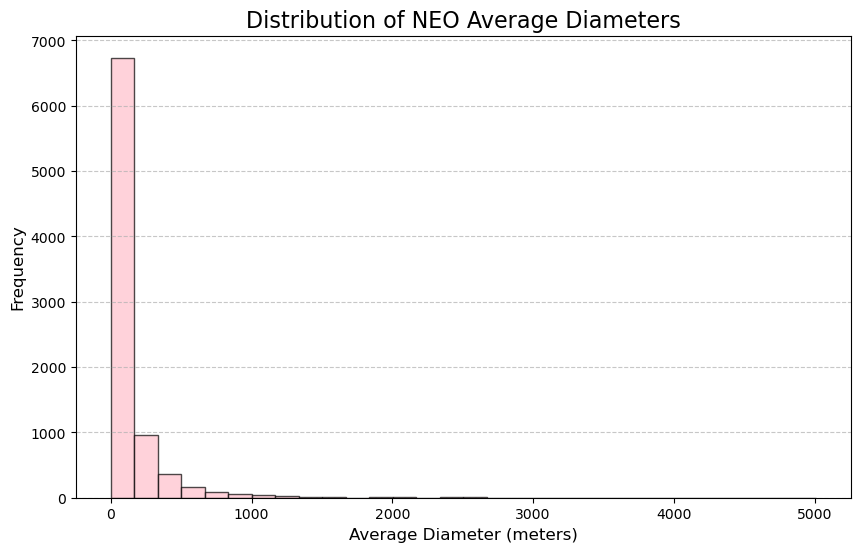

In [13]:
import matplotlib.pyplot as plt

# Plot the histogram for 'average_diameter'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(neo_df['average_diameter'], bins=30, color="pink", edgecolor="black", alpha=0.7)  # Create the histogram
# neo_df['average_diameter']: Column is used as the dataset for the histogram.
# bins=30: Divides the range of diameters into 30 bins. 
# alpha=0.7: Makes the bars slightly transparent for better readability.

# Add labels, title, and grid for better readability
plt.title("Distribution of NEO Average Diameters", fontsize=16)
plt.xlabel("Average Diameter (meters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis

# Display the plot
plt.show()

The histogram of NEO average diameters shows that most Near Earth Objects are small, with diameters under 100 meters, while larger NEOs are rare. This highlights a skewed distribution, emphasizing the need to monitor large NEOs due to their potential threat, despite their rarity.

**Improved Histogram**

The histogram can be improved to better communicate the distribution of NEO average diameters and align with the principles of effective visualization. 

Firstly, the title and axis labels could be made more descriptive to provide better context for the audience. 

Secondly, the bin size can be adjusted to capture more granular details about the distribution, particularly for smaller NEOs, as the current bins may obscure finer variations in the data. A finer binning strategy would help to better illustrate the clustering of smaller diameters.

Thirdly, the color scheme can be enhanced to increase contrast and draw attention to the data distribution. Using a more striking color or gradient, instead of the current light pink, can make the histogram more visually engaging and easier to interpret.

Additionally, annotations could be added to highlight key statistics, such as the mean or median diameter, or to note the proportion of NEOs with smaller diameters (e.g., less than 100 meters). This would provide valuable insights directly within the chart, reducing the need for external explanations.

Lastly, simplifying the y-axis gridlines and ensuring that the overall layout is clean and professional would further improve the clarity and readability of the histogram. Implementing these changes would ensure that the histogram effectively conveys the key patterns and insights within the dataset.

Below codes will made an improvement of the Histogram

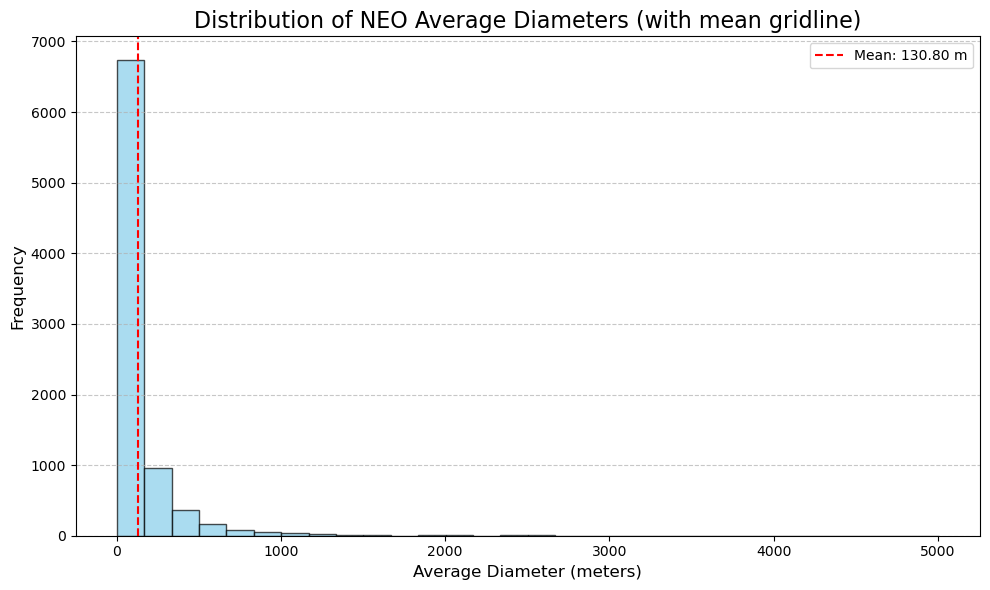

In [14]:
import matplotlib.pyplot as plt

# Plot the histogram for 'average_diameter'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(neo_df['average_diameter'], bins=30, color="skyblue", edgecolor="black", alpha=0.7)  # Create the histogram

# Calculate basic statistics
mean_size = neo_df["average_diameter"].mean()

# Add vertical lines for key statistics
plt.axvline(mean_size, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_size:.2f} m')


# Add labels, title, and grid for better readability
plt.title("Distribution of NEO Average Diameters (with mean gridline)", fontsize=16)
plt.xlabel("Average Diameter (meters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()  
plt.show()



The following code generates a box plot, which illustrates the relationship as well.

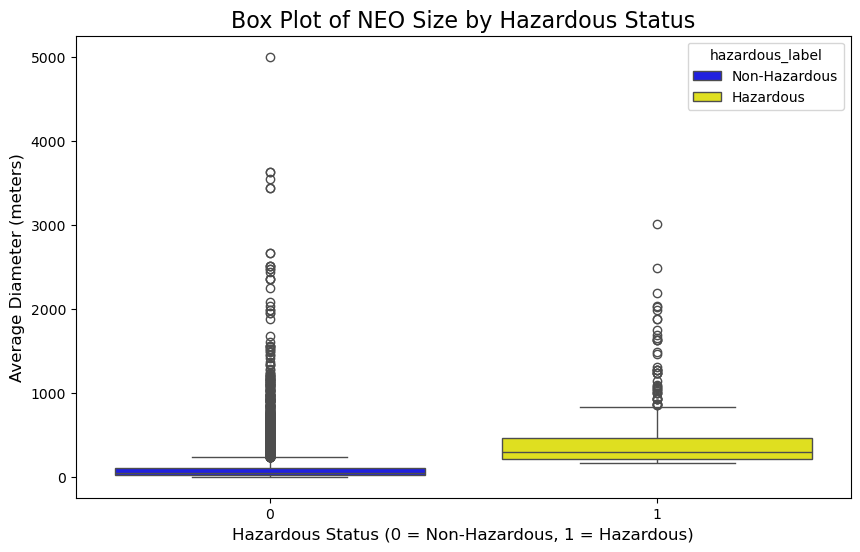

In [15]:
import seaborn as sns

# Add a numeric column for hazardous status
neo_df['hazardous_numeric'] = neo_df['is_potentially_hazardous'].astype(int)

# Add a label column for hazardous status
neo_df['hazardous_label'] = neo_df['is_potentially_hazardous'].map({True: 'Hazardous', False: 'Non-Hazardous'})

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=neo_df,
    x="hazardous_numeric",  # Hazardous status
    y="average_diameter",  # Average diameter
    hue="hazardous_label",  # Color by hazardousness
    palette=["blue", "yellow"]  # Colors for the two groups
)

# Add labels and title
plt.title("Box Plot of NEO Size by Hazardous Status", fontsize=16)
plt.xlabel("Hazardous Status (0 = Non-Hazardous, 1 = Hazardous)", fontsize=12)
plt.ylabel("Average Diameter (meters)", fontsize=12)

# Display the plot
plt.show()


The box plot shows that hazardous NEOs generally have larger average diameters and greater size variability compared to non-hazardous NEOs. While size influences hazard classification, the presence of smaller hazardous and larger non-hazardous NEOs suggests other factors, like proximity, also contribute.

#### Textbook Practice

The goal of this practice is to create a visualization that effectively communicates the proportion of hazardous Near Earth Objects (NEOs) and provides evidence to support conclusions about their rarity and significance.

To design an effective visualization, the following principles from "Storytelling with Data" were applied:
1. Choosing an appropriate display (Chapter 2)
2. Eliminating clutter (Chapter 3)
3. Drawing attention where needed (Chapter 4)
4. Thinking like a designer (Chapter 5)

The following visualization was created to illustrate the proportion of hazardous Near Earth Objects (NEOs) in the dataset. This include choosing the right type of display, simplifying the chart to remove unnecessary elements, using color to emphasize critical insights, and designing the visualization with the audience's perspective in mind. 

The codes below demonstrates the results of the visualization

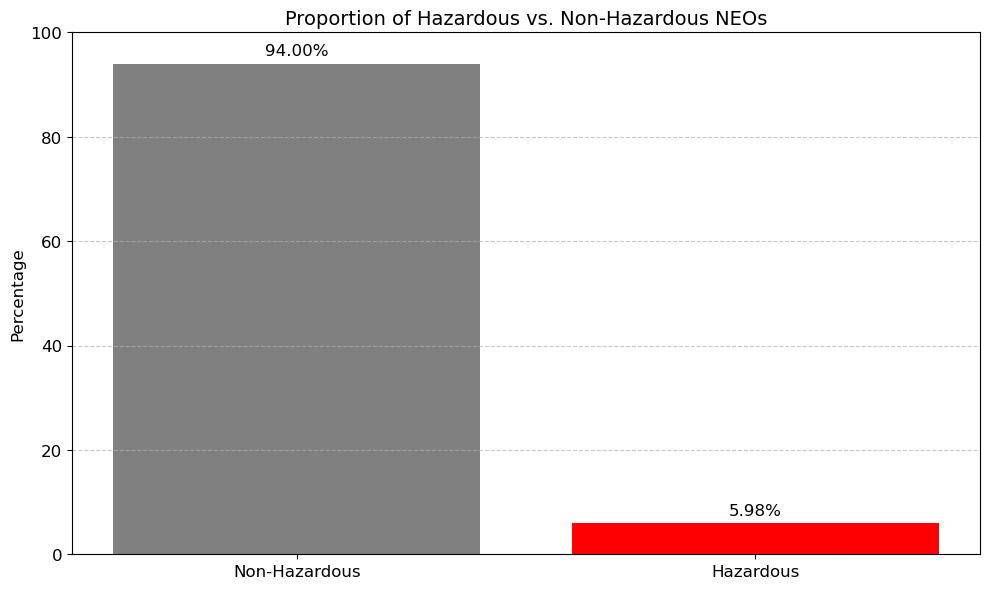

In [16]:
import matplotlib.pyplot as plt

labels = ['Non-Hazardous', 'Hazardous']
values = [94, 5.98]  # Proportion percentages

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['gray', 'red'])


# Annotate the bars with values
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height() + 1,              # Y-coordinate (slightly above the bar)
        f'{value:.2f}%',                   # Text to display
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Add labels and title
plt.title("Proportion of Hazardous vs. Non-Hazardous NEOs", fontsize=16)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 110)  # Adjust the y-axis limit to make space for the text

# Customize the chart
plt.title('Proportion of Hazardous vs. Non-Hazardous NEOs', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


This visual comparison underscores that hazardous NEOs make up only a small fraction of the dataset, approximately 6%, emphasizing their rarity. However, their potential threat to Earth makes them critically important for monitoring and further analysis. The clear differentiation between the two categories ensures the viewer can quickly grasp the imbalance and understand the key takeaway from the data.

#### Summary

The analysis of the NEOs dataset has provided valuable insights into their characteristics and potential hazards. The histogram highlighted that most NEOs are small in size, with a significant skew toward objects under 100 meters in diameter. Despite their rarity, larger NEOs demand attention due to their potential for catastrophic impact.

The scatter plot showed the relationship between NEO size and their closest approach distance, emphasizing that proximity to Earth is a crucial factor in assessing risk. The majority of hazardous NEOs were clustered closer to Earth, regardless of size.

The boxplot further revealed that hazardous NEOs tend to have larger average diameters and a broader size variability compared to non-hazardous ones. However, size alone does not solely determine hazard status, indicating that additional criteria like proximity play a role.

Lastly, the analysis of proportions highlighted that only 6.01% of the NEOs in the dataset are classified as potentially hazardous, indicating that most NEOs are not considered a significant threat. Nonetheless, the monitoring of these objects remains critical to mitigate risks and ensure planetary safety.

These visualizations and statistical analyses collectively provide a comprehensive understanding of the dataset, offering clear evidence for evaluating the potential hazards posed by NEOs.

### Task 3: Data Visualization Part A


This task involves creating visualizations to analyze NEO patterns, focusing on clear and effective displays while applying design principles.

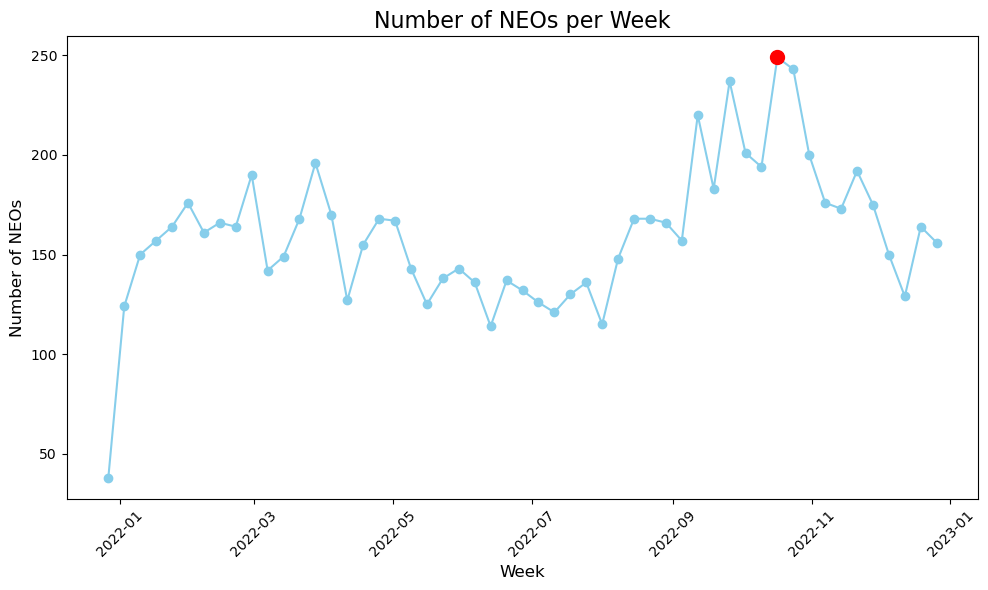

In [17]:
#line plot of the number of NEOs per week:

# First i load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Then i convert 'date' to datetime 
neo_df['date'] = pd.to_datetime(neo_df['date'])

# Then i convert the date column to datetime format
neo_df['week'] = neo_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

#Then I divide it into groups per week: Groups data by week, tallying the number of NEOs and computing the weekly average diameter.
neo_weekly = neo_df.groupby('week').agg(
    neos_per_week=('name', 'count'),
    avg_diameter_per_week=('average_diameter', 'mean')
).reset_index()

# And finally i make a Visualization: A line chart displaying the weekly count of NEOs, with the week containing the highest number of NEOs highlighted in red for emphasis.
plt.figure(figsize=(10, 6))

# Plot a line chart of NEO counts per week
plt.plot(neo_weekly['week'], neo_weekly['neos_per_week'], marker='o', linestyle='-', color='skyblue')

# Highlight the week with the highest NEO count
max_week = neo_weekly.loc[neo_weekly['neos_per_week'].idxmax()]
plt.plot(max_week['week'], max_week['neos_per_week'], marker='o', color='red', markersize=10)

# A title is added to the chart with the text "Number of NEOs per Week."
plt.title('Number of NEOs per Week', fontsize=16)

# The x-axis is labeled "Week," and the y-axis is labeled "Number of NEOs," both with customized font sizes.
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of NEOs', fontsize=12)

# The labels on the x-axis are rotated by 45 degrees to prevent overlap and improve readability.
plt.xticks(rotation=45)

# Any gridlines present in the plot are turned off for a cleaner look.
plt.grid(False)

# Adjust layout: This ensures that all elements of the plot (title, labels, etc.) fit nicely within the figure boundaries.
plt.tight_layout()

# Display the plot
plt.show()



The line plot shows the number of NEOs (Near Earth Objects) registered weekly during the year. The week with the highest number of NEOs is highlighted with a red dot (around 2022-10, with the number of NEOs just over 225). Overall, the plot shows fluctuations in the number of detections with notable changes throughout the year

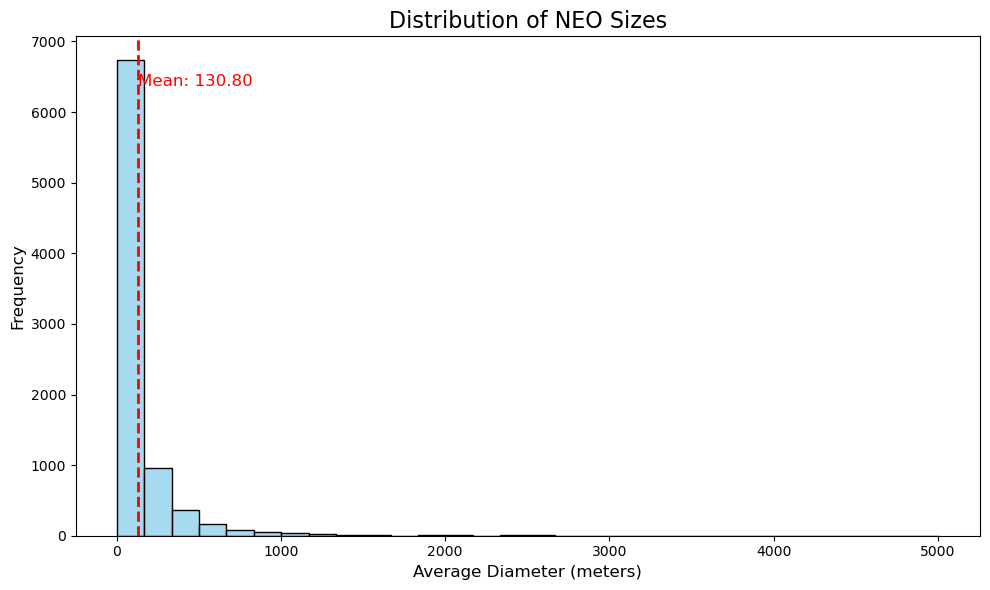

In [18]:
# Histogram of the distrubution of NEO sizes:

# NEO size distribution, with the mean size marked by a red dashed line and clearly labeled for reference.

# Initialize a figure for the histogram
plt.figure(figsize=(10, 6))

# A histogram is plotted using the Seaborn library's histplot function:
sns.histplot(neo_df['average_diameter'], bins=30, kde=False, color='skyblue', edgecolor='black')

# The mean (average) size of all NEOs is calculated from the average_diameter column using .mean().
mean_size = neo_df['average_diameter'].mean()

# A vertical dashed line is drawn at the mean value
plt.axvline(mean_size, color='red', linestyle='--', linewidth=2)

# Text is added to label the mean value
plt.text(mean_size, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_size:.2f}', color='red', fontsize=12)

# Add a title and axis labels
plt.title('Distribution of NEO Sizes', fontsize=16)
plt.xlabel('Average Diameter (meters)', fontsize=12)

# Font sizes are adjusted for readability.
plt.ylabel('Frequency', fontsize=12)

# Remove gridlines
plt.grid(False)

# Ensure that all elements (title, labels, histogram bars) fit within the figure’s boundaries.
plt.tight_layout()

# Display the plot
plt.show()

The graph shows the size distribution of NEO with most of them having small diameters. The average size is 131.92 meters, which is represented by a red dashed line. The distribution is highly unevenly on the right side, with a small number of significantly larger objects acting as outliers.

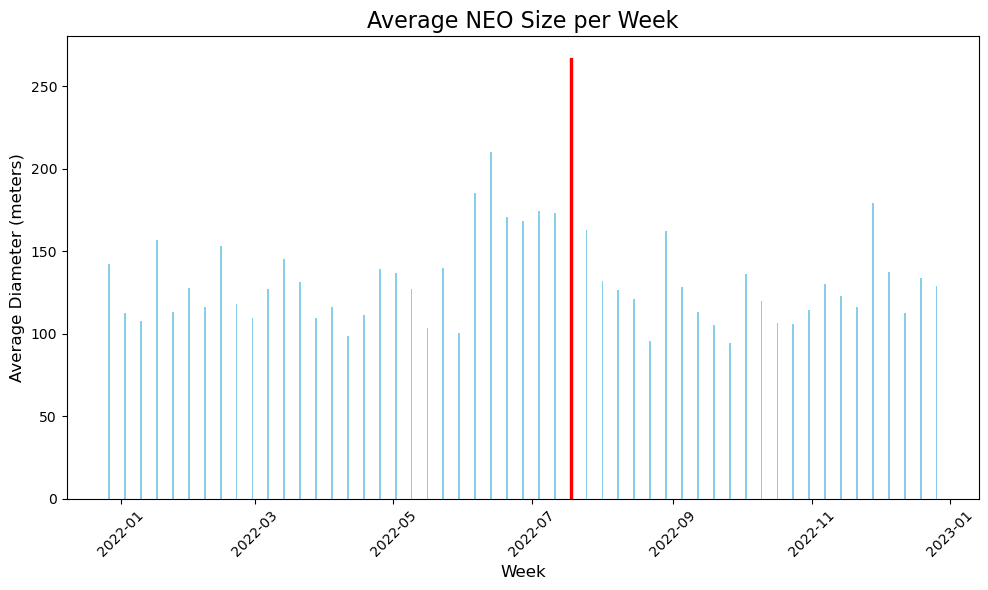

In [19]:
# Bar plot of the average NEO size per week:

# First i set up the figure size: 
plt.figure(figsize=(10, 6))

# Then i create a bar plot:
bars = plt.bar(neo_weekly['week'], neo_weekly['avg_diameter_per_week'], color='skyblue')

# Then i identify the maximum average size:
max_avg_size = neo_weekly['avg_diameter_per_week'].idxmax()

# Highlight the bar with the maximum value:
bars[max_avg_size].set_color('red')

# Add a title and axis labels:
plt.title('Average NEO Size per Week', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Diameter (meters)', fontsize=12)

# Rotate the x-axis labels:
plt.xticks(rotation=45)

# Remove the grid:
plt.grid(False)

# Adjust the layout:
plt.tight_layout()

#Display the plot:
plt.show()


The bar graph shows the average size of NEOs per week, with week 2022-07 having the largest size, just over 250 in average diameter, (highlighted in red). The values ​​fluctuate over the year, but show no consistent trend.

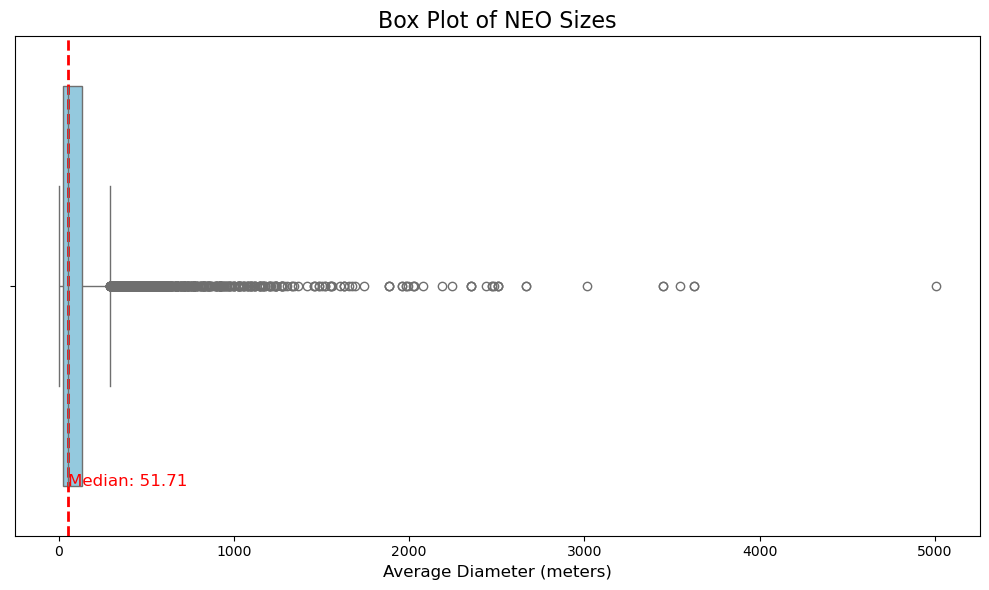

In [20]:
# More complex visualization: 

# A figure of size 10x6 units is created for the visualization.
plt.figure(figsize=(10, 6))

# A box plot is generated using Seaborn's boxplot function:
sns.boxplot(x=neo_df['average_diameter'], color='skyblue')

# Add a title and axis labels
plt.title('Box Plot of NEO Sizes', fontsize=16)
plt.xlabel('Average Diameter (meters)', fontsize=12)

# The median value of the average_diameter column is computed using .median().
median = neo_df['average_diameter'].median()

# A vertical dashed line is drawn at the median:
plt.axvline(median, color='red', linestyle='--', linewidth=2)

# Annotate the median on the plot
plt.text(median, 0.1, f'Median: {median:.2f}', color='red', fontsize=12, transform=plt.gca().get_xaxis_transform())

# Remove gridlines
plt.grid(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show() 

The box plot of Neo Sizes effectively demonstrates how the sizes of NEO are distributed. From the graph, it is clear that NEO sizes are primarily found in relatively low diameters, with a few outliers occupying larger diameters. The median size [52,18] is highlighted by a red dashed line

#### Textbook Practice

**Choose an appropriate display:**

3 main goals:
1. Selecting the right graph or chart
2. Use Familiar Visuals:
3. Highlighting Key Data:

The principle focuses on selecting the most effective visualization type to represent your data. For instance:
    - Use a line graph to show trends over time
    - Choose a bar chart to compare categories.
    - Highlight a single key value using simple text or a numeric callout rather than a graph.

The selected plot should align with the data's purpose and the audience's needs. For example, executives prefer high-level summaries, while analysts may require detailed breakdowns.

Choosing the right display ensures clarity and prevents confusion or misinterpretation. For instance, if you use a pie chart with too many categories, it can be hard to interpret, so a stacked bar chart may be a better alternative.

**Eliminate clutter:**

3 main goals:
1. Minimize unnecessary visual elements
2. Focus on simplicity
3. Apply gestalt principles 

The principle emphasizes removing unnecessary visual elements that do not contribute to the story. For example:
    - Remove gridlines, decorative backgrounds, and 3D effects that distract from the data
    - Keep the design minimalistic, ensuring the data is the main focus

The plot should highlight only the most relevant data:
    - Use color or labels strategically to draw attention to key points.
    - Use white space effectively to guide the viewer's attention to important elements.

Applying Gestalt principles enhances clarity:
    - Group related data visually using proximity, alignment, or similar colors to make relationships clear.
    - Contrast key insights against less important elements to prioritize focus.

#### Summary 

In summary, "Choose an appropriate display" ensures that the selected visualization effectively conveys the data's story to the audience, while "Eliminate clutter" focuses on removing unnecessary elements to enhance clarity and emphasize the most important insights. Together, these principles create impactful and easy-to-understand visualizations that effectively communicate key messages.

### Task 4: Data Visualization Part B


This task involves creating and customizing visualizations, including interactive plots, to analyze NEO classifications and correlations, focusing on clarity and key insights.

A pie chart is a visualization of values that meets the defined successes or specific values out of a whole. In this pie chart, the visualization is based on hazardous and non-hazardous NEOs.

Number of Non-Hazardous NEOs: 7970
Number of Potentially Hazardous NEOs: 507


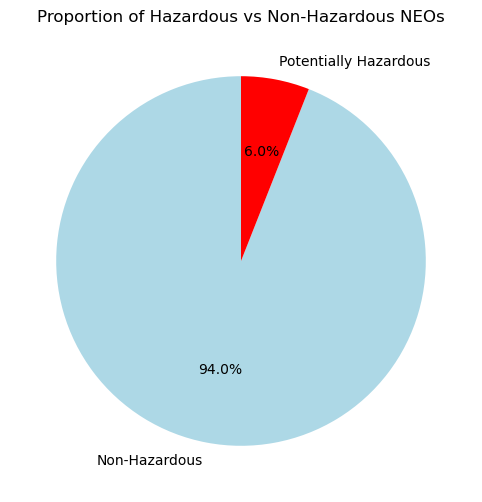

In [21]:
import matplotlib.pyplot as plt

# Count the number of hazardous and non-hazardous NEOs
hazardous_counts = neo_df['is_potentially_hazardous'].value_counts()
hazardous_labels = ['Non-Hazardous', 'Potentially Hazardous']

# Display the counts
print(f"Number of Non-Hazardous NEOs: {hazardous_counts[False]}")
print(f"Number of Potentially Hazardous NEOs: {hazardous_counts[True]}")

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    hazardous_counts, 
    labels=hazardous_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'red']
)
plt.title("Proportion of Hazardous vs Non-Hazardous NEOs")
plt.show()

This pie chart shows the part of hazardous and non-hasardous NEOs. It can be improved by adding a outline of the circle and changing colors. Additionally, the statistics of hazardous and non-hazardous NEOs are shown in percentage where numbers may be more optimal to understand how many dangerous NEOs there are out of all NEOs. Therefore, a text with the number is added. The definition of total number of NEOs are added to the previous codes:

Number of Non-Hazardous NEOs: 7970
Number of Potentially Hazardous NEOs: 507
Total Number of NEOs: 8477


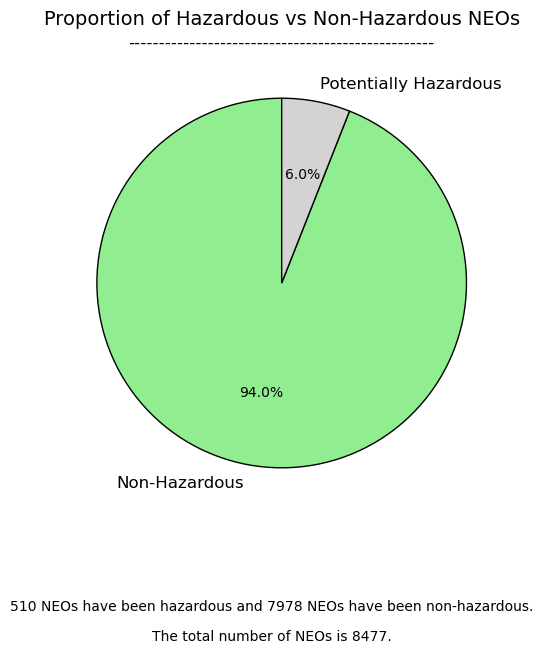

In [22]:
# Count the number of hazardous and non-hazardous NEOs
hazardous_counts = neo_df['is_potentially_hazardous'].value_counts()
hazardous_labels = ['Non-Hazardous', 'Potentially Hazardous']
total_neos = hazardous_counts.sum()

# Display the counts
print(f"Number of Non-Hazardous NEOs: {hazardous_counts[False]}")
print(f"Number of Potentially Hazardous NEOs: {hazardous_counts[True]}")
print(f"Total Number of NEOs: {total_neos}")

# Create a pie chart with the updated colors
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    hazardous_counts, 
    labels=hazardous_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'lightgray'],  # Non-hazardous: Light Green, Hazardous: Light Gray
    wedgeprops={'edgecolor': 'black'}   # Black outline around the circle
)

# Customize text sizes
for autotext in autotexts:
    autotext.set_fontsize(10)
for text in texts:
    text.set_fontsize(12)

# Add a title with a line underneath
plt.title("Proportion of Hazardous vs Non-Hazardous NEOs", fontsize=14, pad=20)
plt.gca().text(
    0.5, 1.02, '-' * 50, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12
)

# Add explanatory text below the chart
plt.figtext(
    0.5, -0.05, 
    "510 NEOs have been hazardous and 7978 NEOs have been non-hazardous.", 
    fontsize=10, color='black', ha='center'
)
plt.figtext(
    0.5, -0.1, 
    f"The total number of NEOs is {total_neos}.", 
    fontsize=10, color='black', ha='center'
)

plt.show()

Here is the final pie chart which has been optimized in visualization by changing the colors and adding explainatory text.

This pie chart shows that the majority of NEOs are non-hazardous, comprising 94% (7,978 NEOs). Only 6% (510 NEOs) are classified as potentially hazardous. In total, there are 8,488 NEOs.

A scatterplot and correlation analysis can help explore the relationships between variables related to Near-Earth Objects (NEOs). One such analysis investigates the potential linear relationship between the size of NEOs and their close approach distance. The size of the NEOs is plotted on the x-axis, while the close approach distance is displayed on the y-axis. A correlation coefficient (r) is calculated to determine the strength and direction of this relationship, where r>0 indicates a positive relationship, and r<0 indicates no existing relationship.

Additionally, a correlation analysis is performed to examine the relationship between the average size of NEOs (average_diameter) and their classification as potentially hazardous (is_potentially_hazardous). The Pearson correlation coefficient is used for this analysis, measuring the strength and direction of the linear relationship between these variables. Here:

1. average_diameter: Represents the average size of the NEOs in meters.
2. is_potentially_hazardous: A binary variable indicating whether an NEO is classified as hazardous (1 for hazardous, 0 for non-hazardous).

To ensure the reliability of the results, the statistical significance of the correlation is assessed using a p-value, which helps confirm whether the observed relationship is unlikely to be due to random chance.

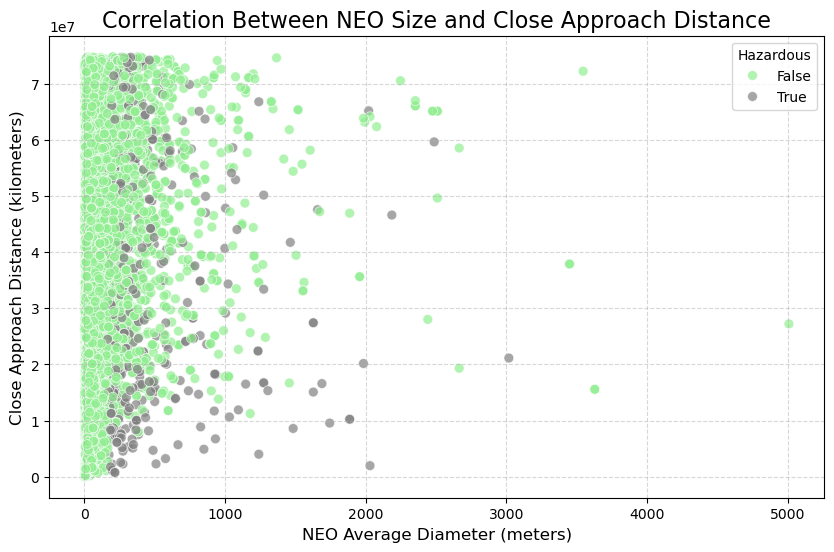

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=neo_df,
    x='average_diameter',  # Assuming this column holds the NEO size in meters
    y='close_approach_distance',  # Assuming this column holds the approach distance in kilometers
    hue='is_potentially_hazardous',  # Color based on hazardous status
    palette={True: 'gray', False: 'lightgreen'},  # Color mapping for the hue
    alpha=0.7,  # Transparency for better visibility
    s=50  # Marker size
)

# Customize plot appearance
plt.title("Correlation Between NEO Size and Close Approach Distance", fontsize=16)
plt.xlabel("NEO Average Diameter (meters)", fontsize=12)
plt.ylabel("Close Approach Distance (kilometers)", fontsize=12)
plt.legend(title="Hazardous", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid lines

# Show the plot
plt.show()


Most NEOs, regardless of their hazardous classification, have close approach distances concentrated within a range of 0 to 1000 meters. This indicates that the majority of NEOs are relatively close in astronomical terms, though not all are deemed hazardous. Smaller NEOs (those with an average diameter close to zero meters) dominate the dataset, appearing in both hazardous and non-hazardous categories. Larger NEOs are less common and are predominantly classified as hazardous. There is some overlap in the size and proximity ranges of hazardous and non-hazardous NEOs. However, the likelihood of being classified as hazardous increases with the size of the NEO, reflecting the criteria used for hazardous classification. Larger NEOs are more likely to pose a significant risk even if their close approach distance varies.

The plot highlights that hazardous classification is influenced by both the size of the NEO and its distance from Earth. While smaller NEOs may come close to Earth, they are less likely to be considered hazardous due to their limited potential impact. Larger NEOs, on the other hand, are more closely monitored and classified as hazardous due to their significant potential for damage. This visualization emphasizes the need for continued monitoring of larger NEOs, as their size and proximity make them more likely to pose a threat to Earth.

Therefore, the data is concentrated within the range 0-1000 meters for improving the scatterplot. 

To improve the Sclatterplot above by using the principles of effective visualization the following is applied:

Firstly, the colors can be improved. Hazardous NEOs are represented in red, while non-hazardous NEOs are displayed in gray. This color scheme ensures that hazardous objects, which are the focal point of the analysis, stand out clearly for the viewer.

To further improve clarity, the y-axis representing the close approach distance is formatted in plain numerical notation, avoiding scientific notation, which might confuse the audience. Additionally, gridlines are included to aid in interpreting the distribution of data points, and a well-placed legend clarifies the two categories of NEOs.

By visually separating hazardous and non-hazardous NEOs, the scatterplot highlights the tendency for most hazardous NEOs to have smaller average diameters and closer approach distances compared to the majority of non-hazardous objects. 

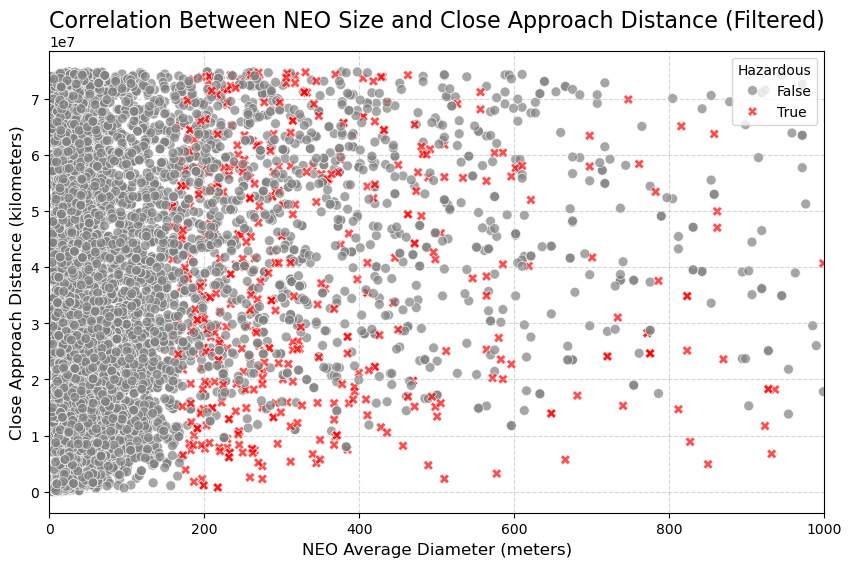

In [24]:
# Create the scatter plot with updated markers and colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=neo_df[neo_df['average_diameter'] <= 1000],  # Filter data to exclude outliers
    x='average_diameter',  # NEO size in meters
    y='close_approach_distance',  # Approach distance in kilometers
    style='is_potentially_hazardous',  # Use marker style for hazardous status
    markers={True: 'X', False: 'o'},  # Hazardous: Red X, Non-Hazardous: Grey Circle
    hue='is_potentially_hazardous',  # Hazardous status
    palette={True: 'red', False: 'grey'},  # Hazardous: Red, Non-Hazardous: Grey
    alpha=0.7,  # Transparency for points
    s=50  # Marker size
)

# Customize plot appearance
plt.title("Correlation Between NEO Size and Close Approach Distance (Filtered)", fontsize=16)
plt.xlabel("NEO Average Diameter (meters)", fontsize=12)
plt.ylabel("Close Approach Distance (kilometers)", fontsize=12)
plt.legend(title="Hazardous", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid lines
plt.xlim(0, 1000)  # Set x-axis range to 0-1000 meters

# Show the plot
plt.show()


To conclude if there is a correlation between NEO average diameter and clode approach distance, a regression line is added to show the general trend is added. In addition to the regression line, the r-coefficient is calculated to suplement the regression line. 

Pearson Correlation Coefficient (r): 0.28
P-Value: 0.00000


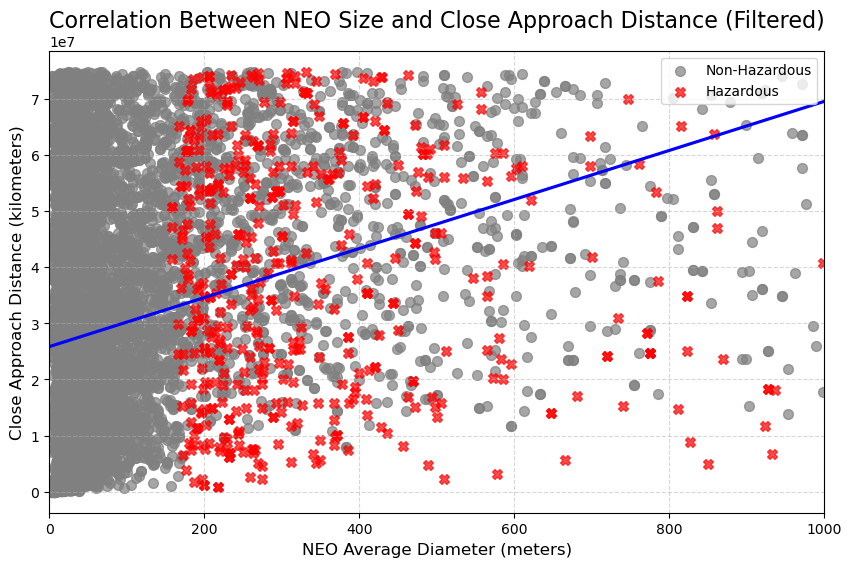

In [25]:
from scipy.stats import pearsonr

# Filter the data to exclude outliers
filtered_data = neo_df[neo_df['average_diameter'] <= 1000]

# Separate data into hazardous and non-hazardous categories
non_hazardous_data = filtered_data[filtered_data['is_potentially_hazardous'] == False]
hazardous_data = filtered_data[filtered_data['is_potentially_hazardous'] == True]

# Calculate the correlation coefficient (r) for the entire dataset
r_value, p_value = pearsonr(filtered_data['average_diameter'], filtered_data['close_approach_distance'])

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot non-hazardous data (grey circles)
plt.scatter(
    non_hazardous_data['average_diameter'],
    non_hazardous_data['close_approach_distance'],
    color='grey',
    label='Non-Hazardous',
    marker='o',  # Circle marker
    alpha=0.7,
    s=50
)

# Plot hazardous data (red X)
plt.scatter(
    hazardous_data['average_diameter'],
    hazardous_data['close_approach_distance'],
    color='red',
    label='Hazardous',
    marker='X',  # X marker
    alpha=0.7,
    s=50
)

# Add a regression line for the entire dataset
sns.regplot(
    data=filtered_data,
    x='average_diameter',
    y='close_approach_distance',
    scatter=False,  # Suppress duplicate scatter points
    line_kws={'color': 'blue', 'label': f"r = {r_value:.2f}"},
    ci=None
)

# Customize plot appearance
plt.title("Correlation Between NEO Size and Close Approach Distance (Filtered)", fontsize=16)
plt.xlabel("NEO Average Diameter (meters)", fontsize=12)
plt.ylabel("Close Approach Distance (kilometers)", fontsize=12)
plt.legend(loc='upper right')  # Add legend
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid lines
plt.xlim(0, 1000)  # Set x-axis range to 0-1000 meters

# Display the r-coefficient
print(f"Pearson Correlation Coefficient (r): {r_value:.2f}")
print(f"P-Value: {p_value:.5f}")

# Show the plot
plt.show()




 The analysis reveals insights into the relationships between the size of NEOs, their classification as hazardous or non-hazardous, and their close approach distances.

A correlation coefficient of 0.28 is observed between the average diameter of NEOs and their hazardous classification, indicating a weak to moderate positive relationship. This suggests that larger NEOs are more likely to be classified as hazardous, although size alone is not a strong determinant. The highly significant p-value (0.00000) confirms that this relationship is not due to random chance, highlighting a meaningful association between NEO size and hazardous classification. While these findings align with expectations—larger NEOs generally pose greater risks in the event of a collision—the weak correlation indicates that additional variables likely influence hazardous classification, warranting further investigation.

The relationship between the size of NEOs and their close approach distances is also explored using a scatter plot. An upward-sloping trend line and correlation coefficient (r = 0.28) suggest a weak positive relationship, where larger NEOs tend to stay farther from Earth. However, the low strength of this correlation means the relationship should not be considered robust. Non-hazardous NEOs are more widely distributed across a range of distances, while hazardous NEOs show less variation.

These findings, visualized through scatter plots, emphasize the importance of considering multiple factors when assessing NEO risks and characteristics.

**Overall, the data implies that smaller NEOs are more likely to approach Earth more closely than larger ones. ** - Er dette rigtigt?

#### Textbook Practice

The principle 'draw attention where you want it' is about ensuring that the audience stays focused on the most critical information in a visualization. This is achieved by using preattentive attributes like color and size to make key data points stand out. Visual hierarchy plays a crucial role as it positions important elements where viewers naturally tend to look. To avoid distractions, unnecessary features like gridlines are removed, and contrast—through bold text or colors—is used to highlight essential details. Lastly, testing the design ensures it successfully guides the viewer’s attention to the intended message.

**Task 2**

Scatterplot: Relationship between NEO size and close approach distance
Red points represent "Hazardous" objects, making them stand out against the gray "Non-Hazardous" points. This visually prioritizes the potentially dangerous objects for the viewer. The legend clearly defines the red and gray points, ensuring the audience understands the distinction between the two categories. The plot also avoids unnecessary clutter, ensuring that the focus remains on the red points. 

Boxplot: Neo size by hazardous status
The color contrast ensures instant visual distinction between the two groups. The plot highlights key elements like the median, quartiles, and outliers, while minimizing distractions to ensure the focus remains on comparing hazardous and non-hazardous objects. The axis labels helps the viewer interpret the data easily and making it more understandable. 

Bars plot: Proportion of hazardous vs. non-hazardous NEOs
The "Hazardous" category is represented in bright red, which strongly contrasts with the gray used for the "Non-Hazardous" category. This ensures immediate focus on the amount of hazardous NEOs. The big contrast in bar height clearly illustrates the significant proportion of non-hazardous objects compared to hazardous ones supporting the main data insight. 


**Task 3**

Line plot: Number of NEOs per week
The red dot is used to emphasize the peak value in the data and the rest of the line is kept in a consistent blue color ensuring the focus remains on the red dot. This also creates a visual hierarchy by standing out against the blue line. The axes provide necessary context for interpreting the data while the title defines the chart's purpose. 

Bar plot: Average NEO size per week
The red line is used to emphasize the specific week with the largest average NEO size, standing out against the blue bars directing the viewer's focus. The uncluttered design, ensures that the red line remains the focus point. The axis provide context for interpreting the data and understanding the red line's position in relation to the average NEO sizes. 

Boxplot: NEO sizes
The median value is highlighted with a red dashed line contrasts against the blue box and ensures it stands out clearly to guide the viewers attention. The labeling of the median value in red supports its importance. The clutter design ensures that the box plot is intuiative interpreative. 

**Task 2 and 3**

Histogram: Distribution of NEO average diameters (with mean gridline)
This visualization uses color to draw attention to the mean illustrated by the red line which contrasts to the blue bars in the histogram. The red line is dashed which also stands out due to the alternative style compared to the rest of the chart's elements, which are uniformly shaded. By eliminating unnecessary clutter, the red line and label stand out clearly without being overshadowed by irrelevant elements, ensuring the viewer's attention stays on the intended focus.

**Task 4**

Pie chart: Proportions of hazardous and non-hazardous NEOs
The two segments are differentiated by colors and both segments are labeled with their percentages. The categories provides a clarity and making the proportions of NEOs immediately understandable. The explanation underneath the chart adds a context and helping the viewers understand the significance of the data. 

Scatterplot: Correlation between NEO size and close approach distance
Points are colored differently with a light and "darker" color ensuring visual distinction between the two categories. The blue regression line emphasizes the correlation between NEO size and close approach distance which guides the viewer to notice the general relationship. The information legend clarifies the meaning of the color coding and helping viewers interpret the scatterplot.

**Overall**, the visualizations apply the principle of 'draw attention where you want it' by including features like color contrast (e.g., red lines or dots), highlighted annotations (e.g., mean or median values), and trend lines to emphasize key insights. This eliminates unnecessary distractions to ensure focus on essential data points. These strategies help viewers quickly understand critical aspects of each chart, such as distributions, proportions, trends, or correlations

#### Summary

The visualizations are used to communicate key insights about NEOs. Key visualizations include a pie chart that compares the proportions of hazardous and non-hazardous NEOs, while the scatter plot examines the relationship between NEO size and close approach distance. This is enhanced by contrasting colors, labels, annotations, and a regression line. By eliminating unnecessary elements, the visualizations maintain a clean design that effectively guides the viewers attention.

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your main findings with a single visualization plot. **Textbook Practice**: You need to explain how the principles below are used for making this plot:
  - "Choose an appropriate display" (Chapter 2)
  - "Eliminate clutter" (Chapter 3)
  - "Draw attention there you want it" (Chapter 4)
  - "Think like a designer" (Chapter 5)

- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

This task involves interpreting NEO visualizations, applying design principles, and making recommendations based on findings. It also includes reviewing a scientific paper to support improved NEO monitoring and hazard assessment.

#### Interpretation
The visualizations and analyses offer valuable insights into the nature of Near Earth Objects (NEOs). One key finding is a strong connection between the size of these objects and their classification as hazardous. Larger NEOs are significantly more likely to be labeled hazardous, while smaller ones tend to fall into the non-hazardous category. This outcome aligns with the expectation that larger objects pose a greater risk due to their higher impact energy, even if the chances of a collision remain relatively low.

The proportion analysis indicates that only a small fraction, approximately 6%, of the NEOs are classified as hazardous. However, the potential damage posed by these hazardous objects necessitates closer monitoring and resource allocation for early detection. This finding underscores the importance of a focused approach in prioritizing resources toward tracking and analyzing larger NEOs that are more likely to present risks.

Furthermore, the visualizations applied principles from "Storytelling with Data" to effectively communicate these findings. The selection of scatterplots and bar charts was deliberate, enabling clear representation of relationships and proportions. Unnecessary elements were eliminated to avoid clutter, and critical data points were emphasized with annotations and color-coded distinctions. This approach ensured that the audience could intuitively interpret the key insights without distraction.

Several recommendations emerge from these findings. First, priority should be given to monitoring larger NEOs since size is a significant factor in hazardous classification. Second, predictive models based on attributes like size and close approach distance could help identify potentially hazardous objects more efficiently. 

In conclusion, this analysis highlights the importance of size as a critical factor in determining the potential hazard posed by NEOs. By applying data-driven insights and effective visualization principles, this task provides a foundation for better understanding NEO characteristics and informs strategies for mitigating their potential threats.


#### Summarizing main findings in plot


**Scatter plot of NEO sizes over time with hazardous classifications**

A scatter plot is used to analyze NEO sizes, hazardous classification (red for hazardous, blue for non-hazardous), and observation dates. A horizontal line marks the average size, aiding pattern and trend identification. 

Below is the code used to create this visualization.

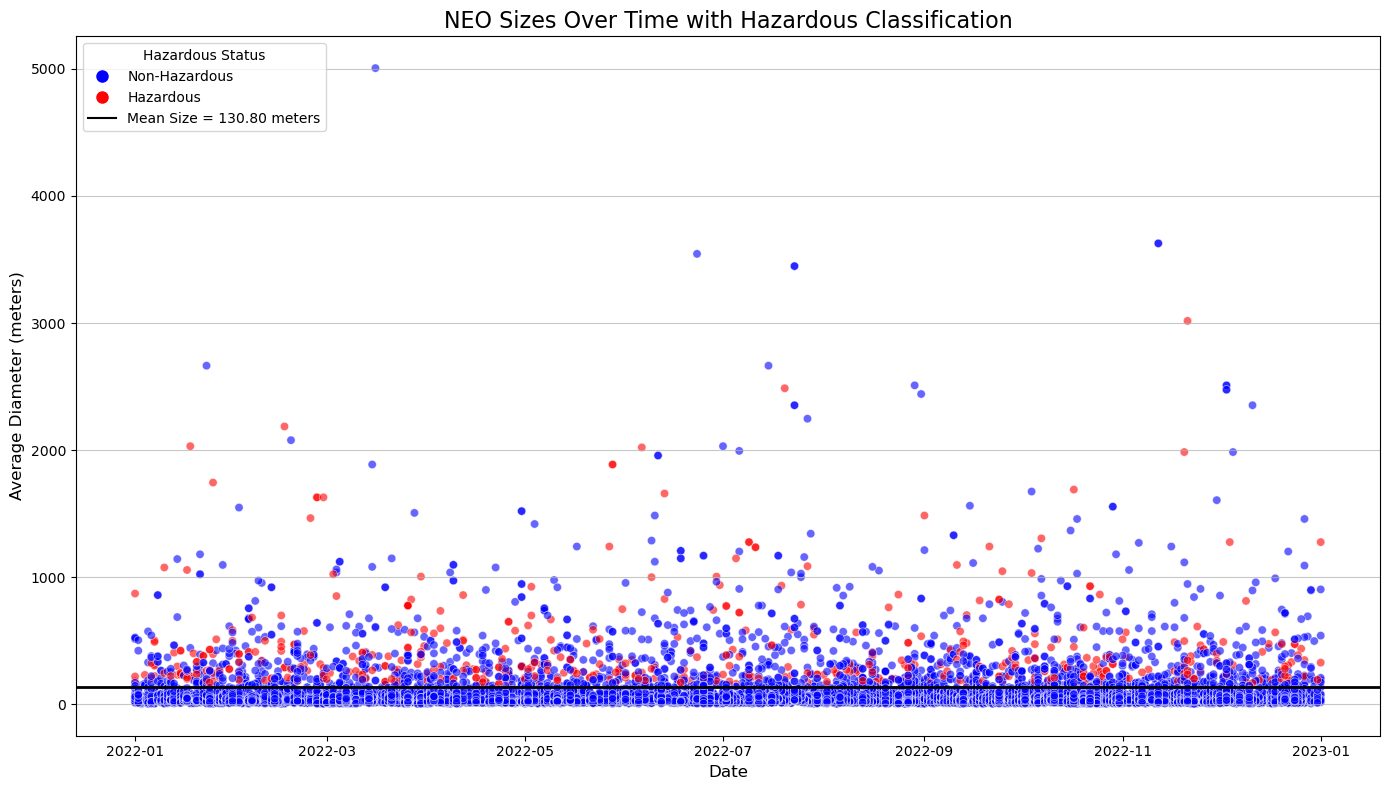

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Convert the 'date' column to datetime for better plotting
neo_df['date'] = pd.to_datetime(neo_df['date'])

# Calculate the mean size
mean_size = neo_df['average_diameter'].mean()

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=neo_df,
    x='date',
    y='average_diameter',
    hue='is_potentially_hazardous',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

# Add a horizontal line for the mean size
plt.axhline(mean_size, color='black', linestyle='-', linewidth=2.0)

# Add a custom legend
handles = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Non-Hazardous'),
    mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Hazardous'),
    mlines.Line2D([], [], color='black', linestyle='-', linewidth=1.5, label=f'Mean Size = {mean_size:.2f} meters')
]
plt.legend(handles=handles, title="Hazardous Status", loc='upper left')

# Add titles and labels
plt.title("NEO Sizes Over Time with Hazardous Classification", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Diameter (meters)", fontsize=12)
plt.grid(axis='y', linestyle="-", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Above scatter plot illustrates the distribution of Near-Earth Objects (NEOs) over time, classified by their hazardous status. Blue dots represent non-hazardous NEOs, while red dots signify hazardous ones. The average size of NEOs is highlighted with a black horizontal line at approximately 131.92 meters.

**Key observations:**

1. Most NEOs, regardless of their classification, are relatively small, with sizes clustered below 1000 meters.
2. Hazardous and non-hazardous NEOs are distributed throughout the observed time period, with no clear temporal patterns.
3. A few exceptionally large NEOs above 3000 meters are visible, but they are rare.

This visualization emphasizes that while most NEOs are small and non-hazardous, monitoring remains crucial due to the presence of larger, potentially hazardous objects.

**Explanation of how the principles mentioned are applied in creating the scatter plot of NEO sizes over time with hazardous classifications**

The scatter plot of NEO sizes over time with hazardous classifications applies key visualization principles to ensure clarity and informativeness. A scatter plot was chosen to effectively show the relationship between observation dates, object sizes, and their hazardous status. 

Colors red for hazardous, blue for non-hazardous and a dashed mean size line enhance interpretability without adding complexity.

Clutter is minimized by avoiding unnecessary gridlines, applying transparency to reduce overplotting, and using only two colors for simplicity. 

Key insights, like hazardous classifications and mean size, are emphasized with color and a clear legend. The design is audience-focused, with clean layouts, meaningful labels, and effective color contrast, making the plot intuitive and easy to understand.


**Time series of average neo sizes by hazardous classification**

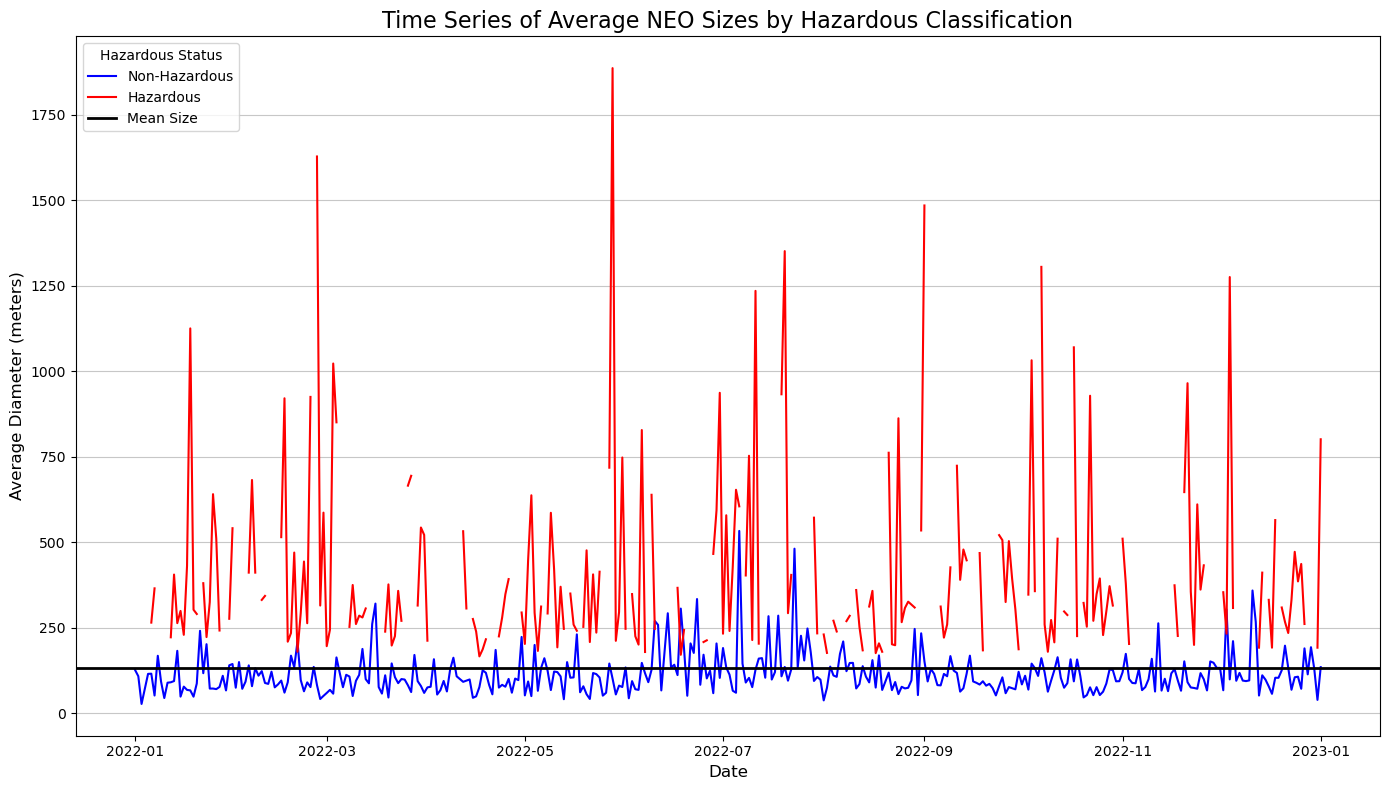

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `neo_df` is your DataFrame

# Convert the 'date' column to a datetime object (if not already)
neo_df['date'] = pd.to_datetime(neo_df['date'])

# Group by date and hazardous status, then calculate the mean size
time_series_data = neo_df.groupby(['date', 'is_potentially_hazardous'])['average_diameter'].mean().reset_index()

# Pivot the data for better plotting
pivoted_data = time_series_data.pivot(index='date', columns='is_potentially_hazardous', values='average_diameter')

# Plot the time series
plt.figure(figsize=(14, 8))
plt.plot(pivoted_data.index, pivoted_data[False], label='Non-Hazardous', color='blue')
plt.plot(pivoted_data.index, pivoted_data[True], label='Hazardous', color='red')

# Add a horizontal line for the overall mean size
mean_size = neo_df['average_diameter'].mean()
plt.axhline(mean_size, color='black', linestyle='-', linewidth=2, label=f'Mean Size = {mean_size:.2f} meters')

# Add labels, title, and legend
plt.title("Time Series of Average NEO Sizes by Hazardous Classification", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Diameter (meters)", fontsize=12)
plt.legend(title="Hazardous Status", labels=["Non-Hazardous", "Hazardous", "Mean Size"], loc="upper left")
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


This plot displays the time series of average diameters of Near-Earth Objects (NEOs) classified as hazardous (red) and non-hazardous (blue). Hazardous NEOs show higher variability and larger spikes in size compared to non-hazardous NEOs, which remain relatively stable around the mean size (dashed black line). The data highlights the distinct size patterns and temporal variations between the two classifications.

**Explanation of how the principles mentioned are applied in creating the scatter plot of NEO sizes over time with hazardous classifications**

The scatter plot with the time series effectively applies several visualization principles to ensure clarity, focus, and usability. First, the plot design aligns with the principle of choosing an appropriate display. The scatter plot is a suitable choice for illustrating the relationship between time (dates), the average size of NEOs, and their hazardous classification. The x-axis represents time, capturing temporal trends, while the y-axis shows variations in size. Using distinct colors to represent hazardous (red) and non-hazardous (blue) objects enhances interpretability, making it easier for the audience to distinguish between classifications.

The principle of eliminating clutter is also applied in the design. The grid lines are kept light and minimal, providing context without overwhelming the viewer. Only essential elements, such as date, average size, and classification, are included in the visualization. A custom legend clarifies the meaning of the markers without introducing redundancy or unnecessary text, ensuring a clean and focused display.

To draw attention to key insights, a horizontal line representing the mean size of NEOs is added. This line serves as a reference point, guiding the viewer's focus toward the average size as a critical contextual element. Its contrasting black color ensures it stands out clearly against the red and blue markers. Furthermore, the red color for hazardous objects naturally draws attention, reflecting their higher significance in the analysis.

The design of the plot adheres to the principle of thinking like a designer. The layout is structured to maximize interpretability, with a clear and descriptive title, "NEO Sizes Over Time with Hazardous Classification," providing context at a glance. Axis labels are precise and explanatory, while the custom legend differentiates between hazardous and non-hazardous objects and includes the mean size for added clarity. The chosen color palette of red and blue is intuitive and avoids ambiguity, contributing to the overall aesthetic and functional quality of the visualization.

These principles work together to create a scatter plot that is not only informative but also visually engaging and easy to understand, ensuring that the key trends and insights about NEOs are communicated effectively.

#### Recommendations

The analysis of Near-Earth Objects (NEOs) highlights that larger NEOs have a higher likelihood of being classified as hazardous, underscoring the need for targeted monitoring even though hazardous objects make up just about 6% of the total population. Additionally, larger non-hazardous NEOs present potential future risks because of their size and impact energy. This finding calls for ongoing tracking to identify any changes in their trajectories or increases in their risk levels over time.

One recommendation could be to use the advantage of AI and spece technology to create a planetary defense and resource utilization initiative. The planterary defense initiative is AI-powered autonomous spacecrafts that will be in orbit to protect Earth from NEOs. The spacecrafts must be equipped with defense ressources and an idea is also to equip the spacecrafts with ressources to mine materials from the NEOs. 
The spacecrafts would be programmed to destray any NEO that is categorised as large as these tend to be more hazardous. When the spacecrafts identify large NEOs they must analyze which material the NEO is and then destroy it and extract materials. The materials can be used for research. 
When scanning and analyzing if the NEO is categorized as large, the spacecraft should still collect data about the NEO for the purpose of improving the defense and the data that forms the base of the analysis.


#### Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5

A clustering or classification method can enhance the understanding and analysis of the assignment results. An example is the application of clustering techniques, such as K-Means clustering, which can group NEOs based on their attributes, such as size, distance, and hazardous classification. This approach reveals patterns in the data that may not be apparent in simple visualizations. For example, clustering large NEOs might show trends we hadn’t considered before, such as certain size ranges being more commonly associated with hazardous classifications..

For instance, clustering could separate NEOs into groups that are associated with being hazardous or non-hazardous, based on shared characteristics like average diameter and close approach distance. This insight could provide a clearer perspective on the traits most associated with hazardous classification, allowing for targeted monitoring of NEOs that fit the identified criteria.

While clustering groups NEOs based on shared characteristics, classification provides a predictive framework for assessing risk levels. Classification methods, such as decision trees or support vector machines (SVM), could be employed to predict whether an NEO is hazardous based on its size, velocity, and approach distance. By training a model using historical data, classification could act as a predictive tool to assess the risk level of newly discovered NEOs.

These methods contribute to Task 5 by supporting data-driven recommendations. For example, clustering might reveal that the largest NEOs within a certain proximity to Earth pose the highest risk, justifying the allocation of more resources to tracking and studying such objects. Similarly, classification algorithms can assist in automatically categorizing future NEO discoveries, and streamlining hazard assessment processes.

The use of clustering or classification methods aligns with the principles of our assignment, including choosing effective visualizations and eliminating clutter, by summarizing complex datasets into actionable insights.These methods contribute to a more robust way of extending our results beyond static plots, providing a better overview of the different results.